## Enzzo Comassetto dos Santos

## Prova 1 Controle 2

## Questão 1

In [1]:
from numpy import linspace, zeros, ones, arange, e, sqrt, pi, abs
from control import c2d, tf, pzmap
import control
import control.matlab
from math import degrees, tan
from cmath import phase, rect
import matplotlib.pyplot as plt
import sympy
import numpy as np
import cmath
import math

In [6]:
T = 0.5
Gs = tf([1, 1],[1,4])
print("Gs =",Gs)

Gz = c2d(Gs, T)
print("Gz =", Gz)

Gs = 
s + 1
-----
s + 4

Gz = 
z - 0.7838
----------
z - 0.1353

dt = 0.5



In [7]:
GHs = Gs*tf([2],[1, 0])
print("GHs =",GHs)

GHz = c2d(GHs, T)
print("GHz =", GHz)

Polos_GHz = control.pole(GHz)
print("Polos de GHz =", Polos_GHz)

GHs = 
 2 s + 2
---------
s^2 + 4 s

GHz = 
  0.5742 z - 0.3581
----------------------
z^2 - 1.135 z + 0.1353

dt = 0.5

Polos de GHz = [1.        +0.j 0.13533528+0.j]


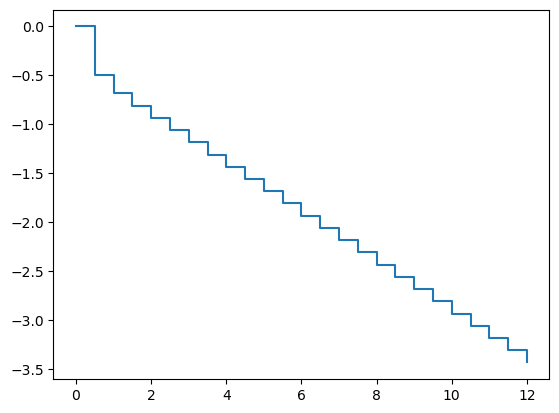

In [10]:
#Equacoes recursivas, calculadas no papel 

#G
#c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]

#GH
#v[k] = 0.5742*e[k-1] - 0.3581*e[k-2] + 1.135*v[k-1] - 0.1353*v[k-2]

#e = r - v

kmax = 25

# Para entrada rampa unitario: T*arange(0,kmax) 
t = T*arange(0,kmax)
r = T*arange(0,kmax)

c = np.zeros(kmax)
v = np.zeros(kmax)
e = np.zeros(kmax)

k = 1

e[k] = x[k] - r[k]
c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]
v[k] = 0.5742*e[k-1]  + 1.135*v[k-1]


for k in range(2, kmax):
    e[k] = x[k] - r[k]
    c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]
    v[k] = 0.5742*e[k-1] - 0.3581*e[k-2] + 1.135*v[k-1] - 0.1353*v[k-2]
    
    

plt.plot(t,c, ds='steps-post')



## Questão 2 - a)

In [22]:
T = 0.2
As = Gs*tf(1,[1,2, 0])
print("As =",As)

Az = c2d(As, T)
print("GHz =", Az)

Polos_Az = control.pole(Az)
print("Polos de Az =", Polos_Az)

As = 
      s + 1
-----------------
s^3 + 6 s^2 + 8 s

GHz = 
0.01458 z^2 - 0.001487 z - 0.008559
-----------------------------------
 z^3 - 2.12 z^2 + 1.421 z - 0.3012

dt = 0.2

Polos de Az = [1.        +0.j 0.67032005+0.j 0.44932896+0.j]


In [23]:
zeta = 0.4
wn = 2

z_mod = np.exp(-T*zeta*wn)
print("Z módulo =", z_mod)

z_ang = T*wn*np.sqrt(1-(zeta**2))
print("Z angulo =", z_ang ,"radianos")

z_rect = cmath.rect(z_mod, z_ang)
print("Z1 forma retangular =",z_rect)

alpha = -0.6703 # Não vai cancelar (z-1), pois este é o integrador que anula o erro ao degrau

print(GHz(z_rect))

Z módulo = 0.8521437889662113
Z angulo = 0.3666060555964672 radianos
Z1 forma retangular = (0.795518217452992+0.3054501641415585j)
(0.026195079085239305-0.7523519826393613j)


In [24]:
s1 = -1*(zeta * wn + 1j* wn *math.sqrt(1 - pow(zeta,2)))
z1 = cmath.exp( s1*T )

print("z1 = ", z1)

z1 =  (0.795518217452992-0.3054501641415585j)


In [25]:
numA = Az.num[0][0];
denA = Az.den[0][0];
numGc = [1, alpha];

phi2 = np.angle(np.polyval(numA,z1))+np.angle(np.polyval(numGc,z1))-np.angle(np.polyval(denA,z1));
phiB = -np.pi-phi2;
beta = (np.imag(z1)-np.real(z1)*np.tan(-phiB))/np.tan(-phiB);

print("Beta = ", beta)

Beta =  -0.9757235173807489


In [27]:
G1 = tf(1, [1, beta], T)
G2 = tf([1, alpha], 1, T)*Az

print("G1z = ", G1)
print("G2z = ", G2)

G1z =  
    1
----------
z - 0.9757

dt = 0.2

G2z =  
0.01458 z^3 - 0.01126 z^2 - 0.007562 z + 0.005737
-------------------------------------------------
        z^3 - 2.12 z^2 + 1.421 z - 0.3012

dt = 0.2



In [28]:
FTMA = G1 * G2
Kc = 1/np.abs(FTMA(z_rect))

print("FTMA = ", FTMA)
print("Kc = ", Kc)

FTMA =  
0.01458 z^3 - 0.01126 z^2 - 0.007562 z + 0.005737
-------------------------------------------------
 z^4 - 3.095 z^3 + 3.489 z^2 - 1.688 z + 0.2939

dt = 0.2

Kc =  8.731128042568308


## b)

In [30]:
beta = 0.25

Gc = tf([Kc, Kc*alpha], [1, beta], T);

print("Gc(z) = ", Gc)

Gc(z) =  
8.731 z - 5.852
---------------
   z + 0.25

dt = 0.2



In [42]:
Kc = Gc * tf([1, 2*beta, beta**2], [1, alpha], T)

Kc 


TransferFunction(array([ 8.73112804, -1.48691111, -2.38054206, -0.3657797 ]), array([ 1.      , -0.4203  , -0.167575]), 0.2)

In [47]:
result = sympy.limit(Kc, z, 2)

NameError: name 'z' is not defined